# 数据处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, shapiro, probplot
import statsmodels.api as sm

matplotlib.rcParams['font.family'] = 'SimSong' # 设置中文字体

path = "./附件.xlsx"

# 读取数据
df = pd.read_excel(path)

df.describe()

,序号,年龄,身高,体重,检测抽血次数,孕妇BMI,原始读段数,在参考基因组上比对的比例,重复读段的比例,唯一比对的读段数,...,21号染色体的Z值,X染色体的Z值,Y染色体的Z值,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,生产次数
count,1082.0000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1.082000e+03,1082.000000,1082.000000,1.082000e+03,...,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000
mean,541.5000,28.939926,161.063771,83.894834,2.487985,32.288791,4.692190e+06,0.797472,0.030474,3.546561e+06,...,-0.115709,0.325178,0.156143,0.077187,0.057025,0.378693,0.391479,0.400851,0.023043,0.379852
std,312.4908,3.656264,5.232176,9.917950,1.127548,2.972432,9.487380e+05,0.014951,0.002747,7.128179e+05,...,1.098919,1.292893,1.307729,0.033518,0.041465,0.003164,0.003020,0.003810,0.003403,0.637178
min,1.0000,21.000000,144.000000,53.000000,1.000000,20.703125,1.342544e+06,0.598638,0.021150,9.806060e+05,...,-3.289376,-3.919148,-4.005487,0.010004,-0.076508,0.366487,0.378465,0.385214,0.011983,0.000000
25%,271.2500,27.000000,158.000000,77.010000,1.000000,30.208806,4.061409e+06,0.790337,0.028664,3.080606e+06,...,-0.855335,-0.479786,-0.666978,0.051381,0.029687,0.376749,0.389702,0.398579,0.020757,0.000000
50%,541.5000,29.000000,161.000000,82.915000,2.000000,31.811598,4.638084e+06,0.800459,0.030246,3.504966e+06,...,-0.139506,0.235179,0.023568,0.075066,0.055099,0.378502,0.391264,0.400683,0.022832,0.000000
75%,811.7500,31.000000,165.000000,89.087500,3.000000,33.926237,5.241410e+06,0.806439,0.032049,3.935570e+06,...,0.631616,1.098768,0.858907,0.098937,0.080623,0.380398,0.393160,0.403102,0.024978,1.000000
max,1082.0000,43.000000,175.000000,140.000000,5.000000,46.875000,9.895358e+06,0.846620,0.046519,7.342907e+06,...,3.137183,7.867670,7.000856,0.234218,0.223933,0.402935,0.412193,0.425052,0.037835,3.000000


检查BMI计算是否正确

In [2]:
df['身高_m'] = df['身高'] / 100 # 身高单位转为米

df['BMI_calc'] = df['体重'] / (df['身高_m'] ** 2) # 计算BMI

df['BMI_diff'] = df['孕妇BMI'] - df['BMI_calc'] # 计算BMI差值

# 检查BMI计算是否正确：如果BMI_diff大于0.01则输出序号
print(df[df['BMI_diff'].abs() > 0.01]['序号'])

Series([], Name: 序号, dtype: int64)


数据预处理
1. 将“检测孕周”由nw+d的格式转换为以周为单位的浮点数

In [3]:
df["检测孕周"] = (
    df["检测孕周"]
    .str.lower()                         # 转为小写
    .str.replace("w", "", regex=False)   # 去掉 'w'
    .str.split("+")                      # 按 "+" 拆分
    .apply(lambda x: int(x[0]) + int(x[1]) / 7 if len(x) > 1 else int(x[0]))
)

print(df["检测孕周"])
df.to_csv("新文件.csv", index=False, encoding="utf-8-sig")

0       11.857143
1       15.857143
2       20.142857
3       22.857143
4       13.857143
          ...    
1077    17.714286
1078    11.571429
1079    12.571429
1080    13.571429
1081    14.571429
Name: 检测孕周, Length: 1082, dtype: float64


检测孕周 Shapiro-Wilk 正态性检验: W=0.920, p=0.000


/var/folders/pm/s9zb3xvj23z5rktgdvrvxh1r0000gn/T/ipykernel_16127/1801991388.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimSong.
  plt.tight_layout()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimSong.
  fig.canvas.print_figure(bytes_io, **kw)


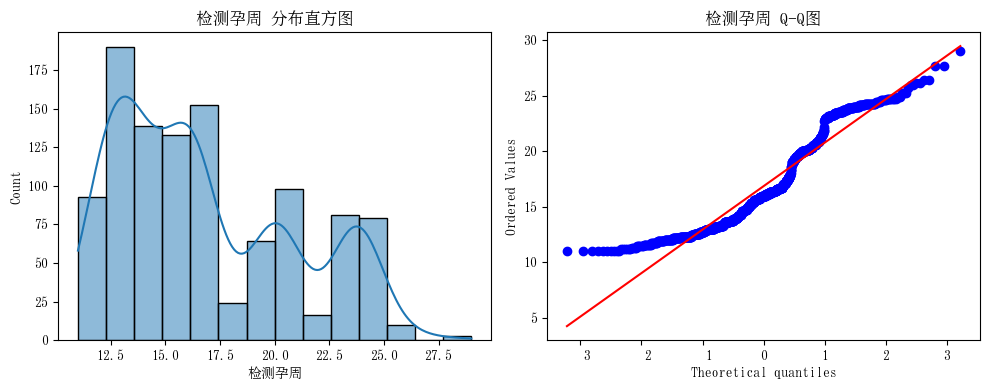

孕妇BMI Shapiro-Wilk 正态性检验: W=0.943, p=0.000


/var/folders/pm/s9zb3xvj23z5rktgdvrvxh1r0000gn/T/ipykernel_16127/1801991388.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimSong.
  plt.tight_layout()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimSong.
  fig.canvas.print_figure(bytes_io, **kw)


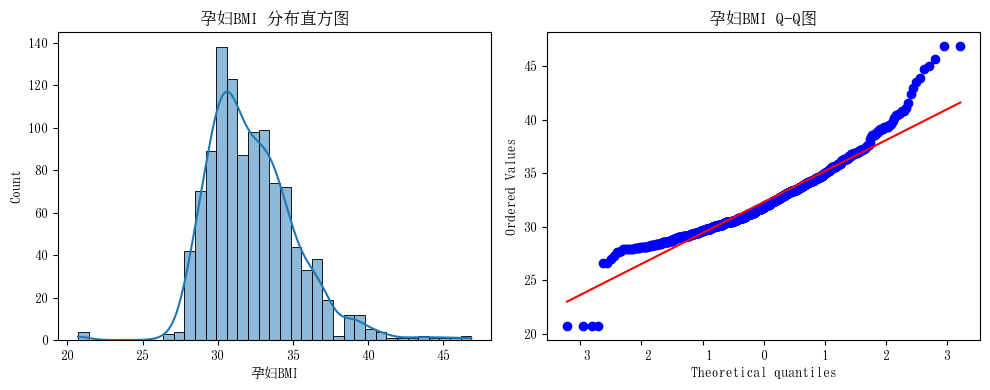

Y染色体浓度 Shapiro-Wilk 正态性检验: W=0.968, p=0.000


/var/folders/pm/s9zb3xvj23z5rktgdvrvxh1r0000gn/T/ipykernel_16127/1801991388.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimSong.
  plt.tight_layout()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimSong.
  fig.canvas.print_figure(bytes_io, **kw)


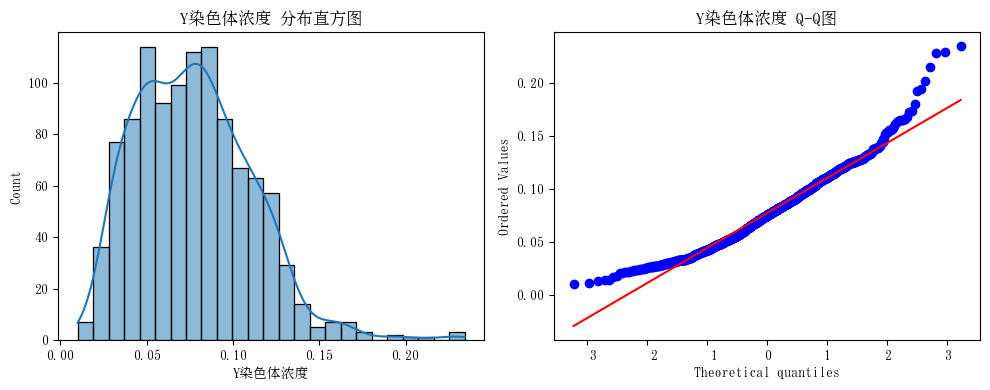

In [4]:
for col in ["检测孕周", "孕妇BMI", "Y染色体浓度"]:
    stat, p = shapiro(df[col])
    print(f"{col} Shapiro-Wilk 正态性检验: W={stat:.3f}, p={p:.3f}")

    # 直方图
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} 分布直方图")

    # Q-Q 图
    plt.subplot(1,2,2)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col} Q-Q图")

    plt.tight_layout()
    plt.show()

In [5]:
def corr_test(x, y, method="pearson"):
    if method == "pearson":
        r, p = pearsonr(x, y)
    else:
        r, p = spearmanr(x, y)
    return r, p

for col in ["检测孕周", "孕妇BMI"]:
    # Pearson
    r, p = corr_test(df[col], df["Y染色体浓度"], method="pearson")
    print(f"Pearson相关 {col} vs Y染色体浓度: r={r:.3f}, p={p:.3e}")

    # Spearman（推荐）
    r, p = corr_test(df[col], df["Y染色体浓度"], method="spearman")
    print(f"Spearman相关 {col} vs Y染色体浓度: r={r:.3f}, p={p:.3e}")

Pearson相关 检测孕周 vs Y染色体浓度: r=0.127, p=2.980e-05
Spearman相关 检测孕周 vs Y染色体浓度: r=0.084, p=5.533e-03
Pearson相关 孕妇BMI vs Y染色体浓度: r=-0.151, p=5.737e-07
Spearman相关 孕妇BMI vs Y染色体浓度: r=-0.155, p=3.019e-07


In [6]:
r, p = corr_test(df["检测孕周"], df["孕妇BMI"], method="spearman")
print(f"Spearman相关 检测孕周 vs 孕妇BMI: r={r:.3f}, p={p:.3e}")

Spearman相关 检测孕周 vs 孕妇BMI: r=0.137, p=6.408e-06


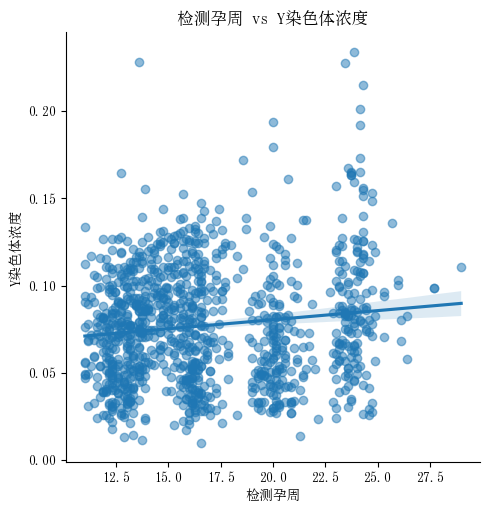

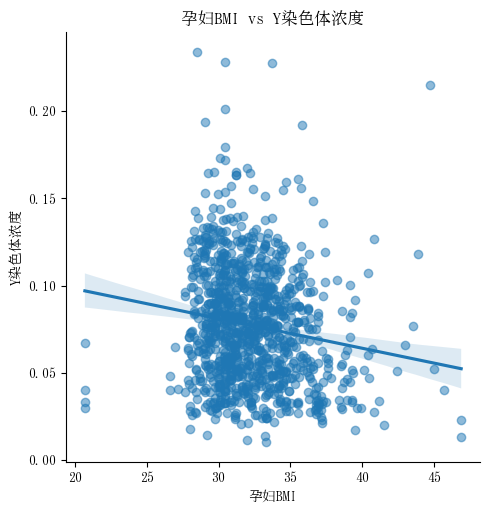

In [7]:
for col in ["检测孕周", "孕妇BMI"]:
    sns.lmplot(x=col, y="Y染色体浓度", data=df, scatter_kws={"alpha":0.5})
    plt.title(f"{col} vs Y染色体浓度")
    plt.show()

In [8]:
X = df[["检测孕周", "孕妇BMI"]]
y = df["Y染色体浓度"]
X = sm.add_constant(X)  # 添加常数项

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Y染色体浓度   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     25.82
Date:                Sat, 06 Sep 2025   Prob (F-statistic):           1.11e-11
Time:                        12:10:45   Log-Likelihood:                 2164.6
No. Observations:                1082   AIC:                            -4323.
Df Residuals:                    1079   BIC:                            -4308.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1195      0.011     10.701      0.0

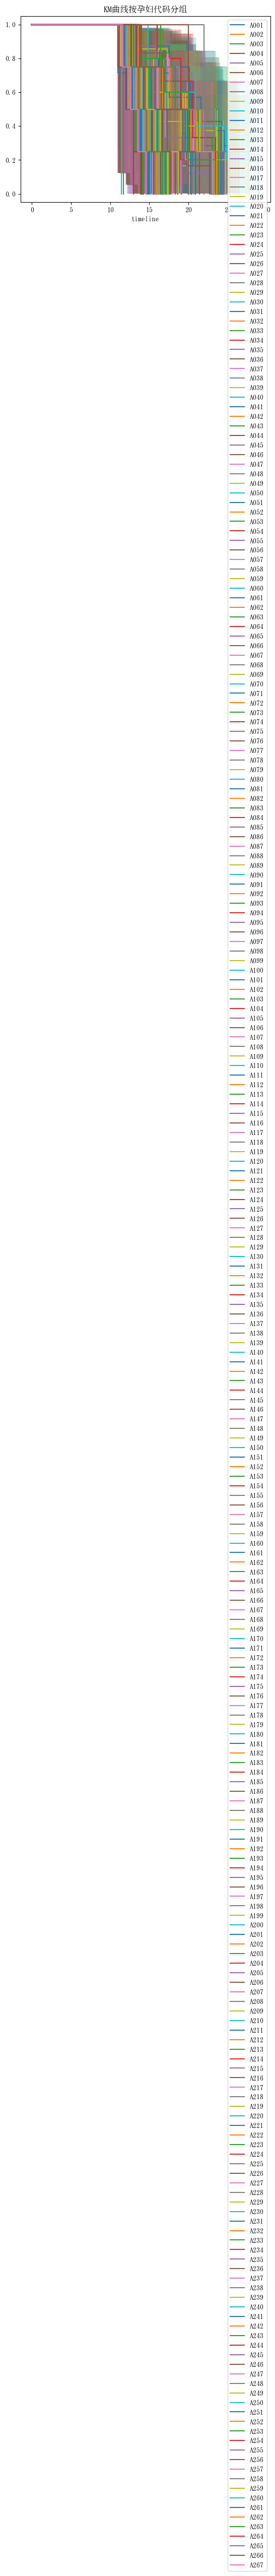

In [9]:
from lifelines import KaplanMeierFitter, CoxPHFitter, WeibullAFTFitter

# Kaplan-Meier (按孕妇代码分组比较)
kmf = KaplanMeierFitter()
for name, grouped_df in df.groupby('孕妇代码'):
    kmf.fit(grouped_df['检测孕周'], grouped_df['孕妇BMI'], label=name)
    kmf.plot_survival_function()
plt.title('KM曲线按孕妇代码分组')
plt.show()

<Axes: xlabel='timeline'>

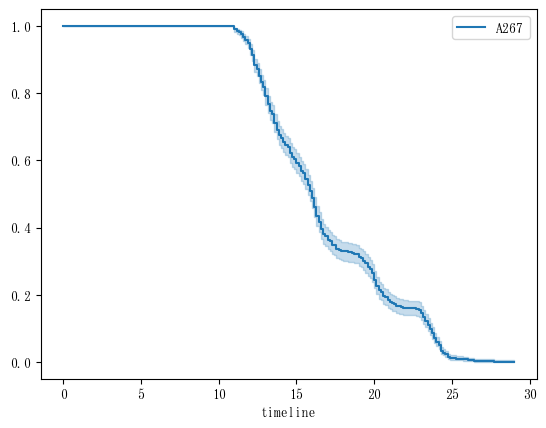

In [10]:
kmf = KaplanMeierFitter()

kmf.fit(df['检测孕周'], df['孕妇BMI'], label=name)
kmf.plot_survival_function()

查找出只采过一次血的孕妇

In [11]:
# 统一清洗列名：去掉前后空格、半角/全角空格
def _norm_cols(cols):
    return [str(c).strip().replace("\u3000", "").replace(" ", "") for c in cols]


df.columns = _norm_cols(df.columns)

# 识别关键列（做一些常见别名的兜底）
id_candidates = "孕妇代码"
draw_candidates = "检测抽血次数"

# 统一将“检测抽血次数”转为数值
df[draw_candidates] = pd.to_numeric(df[draw_candidates], errors="coerce")

# 去掉没有ID的行
df = df[~df[id_candidates].isna()].copy()

# 每位孕妇唯一“检测抽血次数”的个数
unique_counts = df.dropna(subset=[draw_candidates]).groupby(id_candidates)[draw_candidates].nunique()

# 只采过一次血：唯一“检测抽血次数”==1
single_blood_ids = unique_counts[unique_counts == 1].index

# 汇总表：列出这些孕妇及其唯一的抽血次数、相关记录条数（含同一次采血的多次检测）
subset = df[df[id_candidates].isin(single_blood_ids)].copy()


def _unique_draw(s):
    s = s.dropna().unique()
    return int(s[0]) if len(s) > 0 else np.nan


result = subset.groupby(id_candidates, as_index=False).agg(
    唯一抽血次数=(draw_candidates, _unique_draw), 相关记录条数=(draw_candidates, "size")
)

# 友好排序
try:
    result = result.sort_values(by=[id_candidates]).reset_index(drop=True)
except Exception:
    result = result.reset_index(drop=True)

result

,孕妇代码,唯一抽血次数,相关记录条数
0,A081,1,1
1,A116,1,1
2,A118,1,1
3,A120,1,1
4,A123,1,1
5,A156,1,1
6,A164,1,1
